<a href="https://colab.research.google.com/github/Bandinaresh01/Graduate-Admission/blob/main/admission_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv("/Admission_Predict_Ver1.1.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
x=data.drop("Chance of Admit ",axis=1)
y=data["Chance of Admit "]

In [16]:
x=x.drop("Serial No.",axis=1)

In [19]:
scaler=MinMaxScaler()

In [21]:
x=scaler.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
model=Sequential()

In [24]:
model.add(Dense(13,activation="relu",input_dim=7))
model.add(Dense(13,activation="relu"))
#model.add(Dense(13,activation="relu"))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 13)                  │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 300 (1.17 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(loss="mean_squared_error", optimizer="Adam", metrics=['mae'])

In [53]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0033 - mae: 0.0418 - val_loss: 0.0039 - val_mae: 0.0440
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mae: 0.0400 - val_loss: 0.0041 - val_mae: 0.0450
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mae: 0.0399 - val_loss: 0.0042 - val_mae: 0.0450
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mae: 0.0439 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - mae: 0.0430 - val_loss: 0.0042 - val_mae: 0.0484
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mae: 0.0395 - val_loss: 0.0041 - val_mae: 0.0447
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mae: 0.0418 - val_loss: 0.0039 - val_mae: 0.0445
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - mae: 0.0431 - val_loss: 0.0040 - val_mae: 0.0453
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

In [54]:
y_pred=model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [55]:
r2_score(y_test,y_pred)

0.7925185256908182

In [56]:
model.predict(np.array([[337,118,4,4.5,4.5,9.65,1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[117.682076]], dtype=float32)

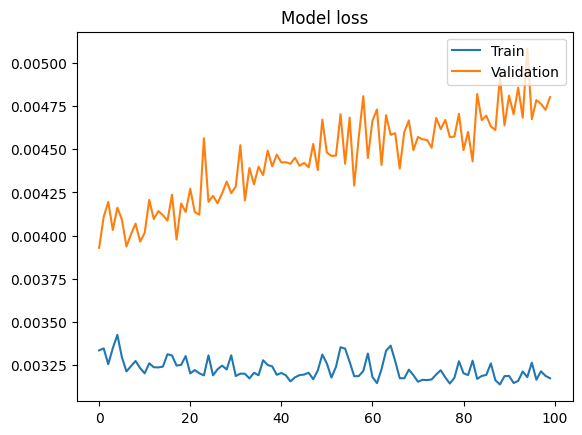

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

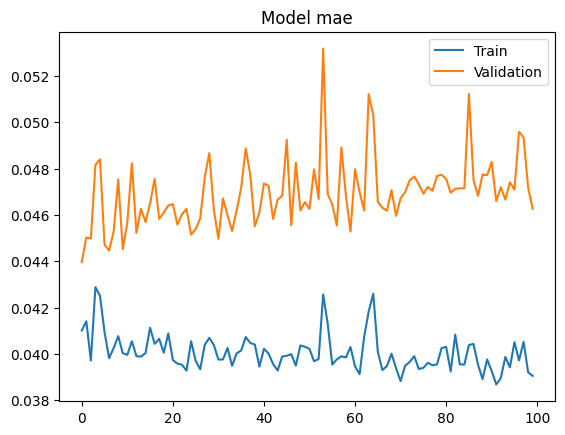

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model mae')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()